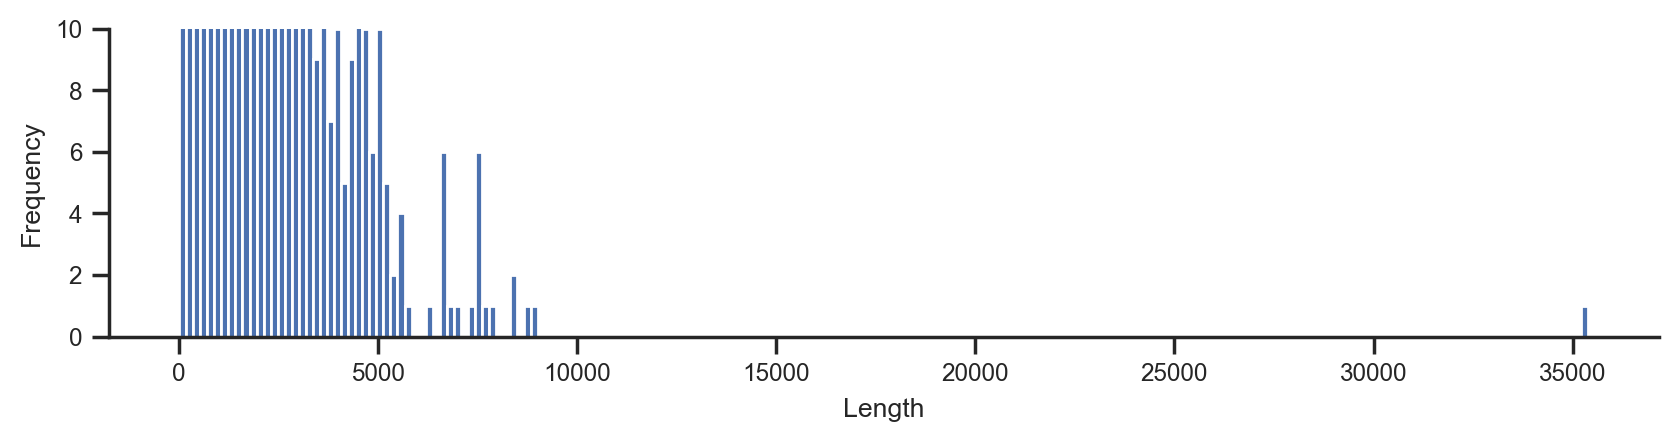

(22052, 4)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gget

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

df_list = []
for start_idx in range(0, 24000, 1000):
    df_list.append(pd.read_csv(f"./data/aa_seqs_mouse_{start_idx:05d}-{start_idx+1000:05d}.csv"))
df_prot = pd.concat(df_list)
df_prot["sequence_length"] = df_prot["sequence_length"].astype(float)
df_prot.rename(columns={"sequence_length": "aa_seq_length"}, inplace=True)

f, ax = plt.subplots(figsize=(10, 2))
ax.hist(df_prot["aa_seq_length"], bins=200)
ax.set(xlabel="Length", ylabel="Frequency", ylim=(0, 10))
plt.show()

print(df_prot.shape)


In [2]:
df_prot["aa_seq_length"].astype(float).describe().round(2)

count    22052.00
mean       545.34
std        600.92
min          7.00
25%        252.00
50%        390.00
75%        651.00
max      35390.00
Name: aa_seq_length, dtype: float64

In [3]:
df_nuc = pd.read_csv("./data/nuc_seqs_mouse.csv")
df_nuc["nuc_seq_length"] = df_nuc["nuc_seq"].apply(len)
df_nuc["ensemble_id"] = df_nuc["id"].str.split(".").str[0]

df_prot_nuc = pd.merge(df_prot, df_nuc, on="ensemble_id", how="left")
df_prot_nuc["nuc_aa_seq_ratio"] = df_prot_nuc["nuc_seq_length"]/df_prot_nuc["aa_seq_length"]
display(df_prot_nuc.head(3))

,ensemble_id,gene_name,aa_seq_length,aa_seq,id,gene,gene_symbol,chromosome,start,end,strand,nuc_seq,ens_gene_id,nuc_seq_length,nuc_aa_seq_ratio
0,ENSMUST00000103301,Gm20730,119.0,MRCLAEFLRLLVLWIPATGDIVMTQAAPSVPANPGESVSISCRSSK...,ENSMUST00000103301.3,ENSMUSG00000076500.3,Gm20730,GRCm39:6,43058452.0,43059031.0,-1.0,ATGAGGTGCCTAGCTGAGTTCCTGAGGCTACTTGTGCTCTGGATCC...,ENSMUSG00000076500,359,3.016807
1,ENSMUST00000166255,Ighv5-8,92.0,HGCVLRPQTVYFQVKCVFVIISGDGESALHCVYIVGATSTTKNYCH...,ENSMUST00000166255.2,ENSMUSG00000090395.2,Gm54608,GRCm39:12,113618587.0,113618864.0,1.0,CATGGCTGTGTACTCAGACCTCAGACTGTTTATTTTCAGGTAAAGT...,ENSMUSG00000090395,278,3.021739
2,ENSMUST00000095364,Gm54637,98.0,SLTIIVSSVLRCQASELHVGCVGGCVYSKCGLAFELLIVGNTTIFR...,ENSMUST00000095364.3,ENSMUSG00000090765.2,Gm54637,GRCm39:12,114594300.0,114594593.0,1.0,TCTCTCACAATAATAGTCAGCAGTGTCCTCAGATGTCAGGCTTCTG...,ENSMUSG00000090765,294,3.000000


In [4]:
# show rows where gene_name is not same as gene_symbol
df_temp = df_prot_nuc[df_prot_nuc["gene_name"] != df_prot_nuc["gene_symbol"]].reset_index(drop=True)
display(df_temp)
print(df_temp.shape)

,ensemble_id,gene_name,aa_seq_length,aa_seq,id,gene,gene_symbol,chromosome,start,end,strand,nuc_seq,ens_gene_id,nuc_seq_length,nuc_aa_seq_ratio
0,ENSMUST00000166255,Ighv5-8,92.0,HGCVLRPQTVYFQVKCVFVIISGDGESALHCVYIVGATSTTKNYCH...,ENSMUST00000166255.2,ENSMUSG00000090395.2,Gm54608,GRCm39:12,113618587.0,113618864.0,1.0,CATGGCTGTGTACTCAGACCTCAGACTGTTTATTTTCAGGTAAAGT...,ENSMUSG00000090395,278,3.021739
1,ENSMUST00000197518,NaN,117.0,MAWTSLILSLLALCSGASSQAVVTQESALTTSPGGTVILTCRSSTG...,ENSMUST00000197518.2,ENSMUSG00000076940.4,Iglv2,GRCm39:16,19079151.0,19079609.0,-1.0,CTTGGTTTGTGAATTATGGCCTGGACTTCACTTATACTCTCTCTCC...,ENSMUSG00000076940,366,3.128205
2,ENSMUST00000200127,Trav7-2,112.0,MKSFSISLVVLWLQLNWVNSQQKVQQSPESLIVPEGGMASLNCTSS...,ENSMUST00000200127.2,ENSMUSG00000105533.2,Trav7d-2,GRCm39:14,52921421.0,52921929.0,1.0,ATGAAATCCTTTAGTATTTCCCTAGTGGTCCTGTGGCTTCAGCTAA...,ENSMUSG00000105533,337,3.008929
3,ENSMUST00000179789,Trav7-3,112.0,MKSLSVSLVVLWLQLNWVNSQQKVQQSPESLIVPEGAMTSLNCTFS...,ENSMUST00000179789.4,ENSMUSG00000096746.4,Trav7d-3,GRCm39:14,52981706.0,52982297.0,1.0,CTCTTTTCTAGCTGCCAAATTAGAGTTGAGGATCTCAGTCCTCAGT...,ENSMUSG00000096746,402,3.589286
4,ENSMUST00000197754,Trav6-6,114.0,MDSSPGFVAVILLILGRTHGDSVTQTEGPVTVSESESLIINCTYSA...,ENSMUST00000197754.2,ENSMUSG00000094176.7,Trav6d-6,GRCm39:14,53059379.0,53059816.0,1.0,ATGGACTCTTCTCCAGGCTTCGTGGCTGTGATACTTCTCATACTTG...,ENSMUSG00000094176,344,3.017544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,ENSMUST00000046975,PcgF3,241.0,MLTRKIKLWDINAHITCRLCSGYLIDATTVTECLHTFCRSCLVKYL...,ENSMUST00000046975.12,ENSMUSG00000033623.14,Pcgf3,GRCm39:5,108609098.0,108654842.0,1.0,TCTCGTTTGCGAGGTGGGAGCTGAGCCACACACTGCGCATGCTCCA...,ENSMUSG00000033623,7708,31.983402
921,ENSMUST00000110366,Znf2,427.0,MAAVSPPTRCQALVTFEDVAVTFTDDEWKRLVPVQRALYKAVMLEN...,ENSMUST00000110366.8,ENSMUSG00000034800.16,Zfp661,GRCm39:2,127416582.0,127429014.0,-1.0,AGTTCTGCGGAACCGGGAAAGAGTCTGGGAACATCGGGAAGGAGCC...,ENSMUSG00000034800,4912,11.503513
922,ENSMUST00000249906,NaN,22.0,MSDSDSRTEKRKKKRPNGQATF,ENSMUST00000249906.1,ENSMUSG00000121915.1,NaN,GRCm39:2,127968137.0,127970572.0,1.0,ATGTCTGACTCTGATTCTCGGACTGAGAAACGCAAGAAAAAAAGAC...,ENSMUSG00000121915,69,3.136364
923,ENSMUST00000046944,NaN,1187.0,MDPSALDMAIQHALAGLYPPFEATAPTVLGQVFRLLDSDFRGDGLS...,ENSMUST00000046944.6,ENSMUSG00000037813.14,D630003M21Rik,GRCm39:2,158037671.0,158071142.0,-1.0,GTCCGGGTCTGGCTGCCCCTCGGGATGAGGCCGGGTTAGGAGTACT...,ENSMUSG00000037813,3910,3.294019


(925, 15)


In [5]:
# we'll retain gene_symbol
df_prot_nuc.isna().sum()

ensemble_id            0
gene_name            161
aa_seq_length          0
aa_seq                 0
id                     0
gene                   0
gene_symbol           87
chromosome          1143
start               1143
end                 1143
strand              1143
nuc_seq                0
ens_gene_id            0
nuc_seq_length         0
nuc_aa_seq_ratio       0
dtype: int64

In [6]:
df_prot_nuc.rename(columns={"ensemble_id": "enst_id", "gene": "ensg_id"}, inplace=True)
df_prot_nuc = df_prot_nuc[["gene_symbol", "ensg_id", "enst_id", "nuc_seq_length", "aa_seq_length", "nuc_aa_seq_ratio", 
                            "chromosome", "start", "end", "strand", "nuc_seq", "aa_seq"]]
display(df_prot_nuc.isna().sum().to_frame().T)

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,87,0,0,0,0,0,1143,1143,1143,1143,0,0


In [7]:
# remove nans in chromosome, retain nan gene_names
# Remaining entries have a well-defined location, aa-sequence and cdna sequence. 

df_prot_nuc = df_prot_nuc[~df_prot_nuc["chromosome"].isna()].reset_index(drop=True)
display(df_prot_nuc.head(3))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,Gm20730,ENSMUSG00000076500.3,ENSMUST00000103301,359,119.0,3.016807,GRCm39:6,43058452.0,43059031.0,-1.0,ATGAGGTGCCTAGCTGAGTTCCTGAGGCTACTTGTGCTCTGGATCC...,MRCLAEFLRLLVLWIPATGDIVMTQAAPSVPANPGESVSISCRSSK...
1,Gm54608,ENSMUSG00000090395.2,ENSMUST00000166255,278,92.0,3.021739,GRCm39:12,113618587.0,113618864.0,1.0,CATGGCTGTGTACTCAGACCTCAGACTGTTTATTTTCAGGTAAAGT...,HGCVLRPQTVYFQVKCVFVIISGDGESALHCVYIVGATSTTKNYCH...
2,Gm54637,ENSMUSG00000090765.2,ENSMUST00000095364,294,98.0,3.000000,GRCm39:12,114594300.0,114594593.0,1.0,TCTCTCACAATAATAGTCAGCAGTGTCCTCAGATGTCAGGCTTCTG...,SLTIIVSSVLRCQASELHVGCVGGCVYSKCGLAFELLIVGNTTIFR...


In [8]:
# clean up: chromosome location being nan seem to be in cases that are 
df_prot_nuc = df_prot_nuc[~df_prot_nuc["chromosome"].isna()].reset_index(drop=True)
display(df_prot_nuc.head(3))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,Gm20730,ENSMUSG00000076500.3,ENSMUST00000103301,359,119.0,3.016807,GRCm39:6,43058452.0,43059031.0,-1.0,ATGAGGTGCCTAGCTGAGTTCCTGAGGCTACTTGTGCTCTGGATCC...,MRCLAEFLRLLVLWIPATGDIVMTQAAPSVPANPGESVSISCRSSK...
1,Gm54608,ENSMUSG00000090395.2,ENSMUST00000166255,278,92.0,3.021739,GRCm39:12,113618587.0,113618864.0,1.0,CATGGCTGTGTACTCAGACCTCAGACTGTTTATTTTCAGGTAAAGT...,HGCVLRPQTVYFQVKCVFVIISGDGESALHCVYIVGATSTTKNYCH...
2,Gm54637,ENSMUSG00000090765.2,ENSMUST00000095364,294,98.0,3.000000,GRCm39:12,114594300.0,114594593.0,1.0,TCTCTCACAATAATAGTCAGCAGTGTCCTCAGATGTCAGGCTTCTG...,SLTIIVSSVLRCQASELHVGCVGGCVYSKCGLAFELLIVGNTTIFR...


🔎🕵🏽‍♂️ The ratio of nucleotide sequence to amino acid sequence is not exactly 3.0 for every gene in our table. 

 - The nucleotide sequence is based on `cdna` here. 
 - `cdna` is the spliced transcript so it excludes `introns`.
 - However, `exons` also contain non-coding regions, e.g. `UTRs`.
 - This explains rations >= 3.0.
 - Version mismatches in the `cdna` sequence vs. amino acid sequence explains ratios < 3.0.

🔎🕵🏽‍♂️ Some positions are missing; spot checks indicate these sometimes contain multiple location annotations, or the annotations are missing altogether. We can simply remove these for now. 

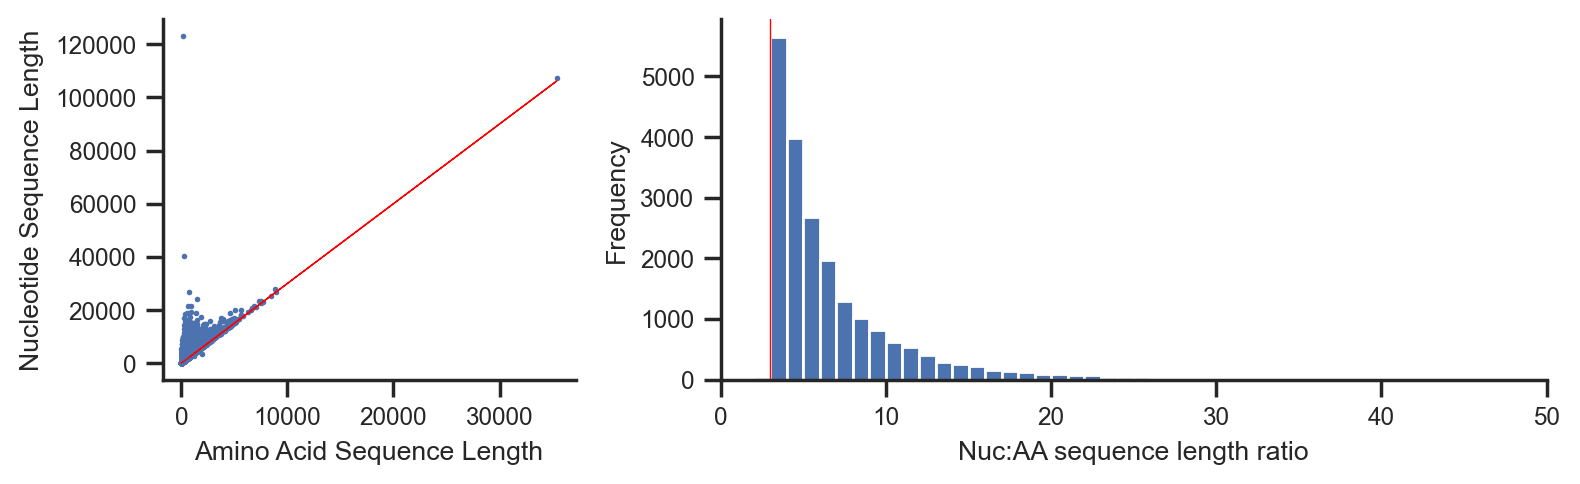

In [9]:
f, ax = plt.subplots(1, 2,figsize=(8, 2.5), gridspec_kw={'width_ratios': [1, 2]})
ax[0].scatter(df_prot_nuc["aa_seq_length"], df_prot_nuc["nuc_seq_length"], s=1)
ax[0].plot(df_prot_nuc["aa_seq_length"], 3*df_prot_nuc["aa_seq_length"], linewidth=.5, color="red")
ax[0].set(xlabel="Amino Acid Sequence Length", ylabel="Nucleotide Sequence Length")

ax[1].hist(df_prot_nuc["nuc_aa_seq_ratio"], bins=np.arange(0, 50, 1))
ax[1].axvline(3.0, color="red", linewidth=0.5)
ax[1].set(xlabel="Nuc:AA sequence length ratio", ylabel="Frequency", xlim=(0, 50))
plt.tight_layout()
plt.show()

In [10]:
# a summary of sequence lengths
display(df_prot_nuc[["aa_seq_length", "nuc_seq_length"]].describe().round(2))

,aa_seq_length,nuc_seq_length
count,20909.00,20909.00
mean,546.00,3116.40
std,586.94,2606.12
min,7.00,23.00
25%,259.00,1512.00
50%,394.00,2567.00
75%,656.00,4036.00
max,35390.00,123179.00


In [11]:
# show the largest 5 ratios
display(df_prot_nuc.sort_values(by="nuc_aa_seq_ratio", ascending=False).head(5))
print("-----")
# show the smallest 5 ratios
display(df_prot_nuc.sort_values(by="nuc_aa_seq_ratio", ascending=True).head(5))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
13120,Nopchap1,ENSMUSG00000020255.9,ENSMUST00000020488,123179,185.0,665.832432,GRCm39:10,83196085.0,83324369.0,1.0,TATATCCGGGCTTCTTTCAGTGGCGCTGGGTTGGAAGCATGGAGTT...,MEFQGERGTGPGVSSSSVACSQVTVSRELLTAGSEGSGGIWDQLLI...
18712,Rusc2,ENSMUSG00000035969.16,ENSMUST00000125399,5351,14.0,382.214286,GRCm39:4,43401253.0,43427088.0,1.0,GGAGGCACTGTCAAAGGATTAGCAAGGTGTTGACCACACTGGGCAG...,MPLLELSRMDSPPK
13507,Macir,ENSMUSG00000044768.17,ENSMUST00000053033,40378,207.0,195.062802,GRCm39:1,97534043.0,97589799.0,-1.0,TTCCCGGCCTCGCCTCCGCAGCCCGCGGGAGGAGGCGGGAAGGCGG...,MEVDINGDSRSTLTTLPLPVAEGSSPGKAEAEKPRCSSTPCSPMRR...
19326,Gm29695,ENSMUSG00000118219.5,ENSMUST00000188175,5271,33.0,159.727273,GRCm39:1,132119195.0,132137284.0,1.0,GTGCAAGAGAGGAGCCGGCTCAGCATCCGAACTACATCTGTTGAGC...,MPQFTFACFCGLHGFCKMKRKKDEVHRERETVV
6098,Tmem167,ENSMUSG00000012422.15,ENSMUST00000161568,8689,72.0,120.680556,GRCm39:13,90237242.0,90260376.0,1.0,GTAGAGTGTGCAAACAAGGAGGGGGCCAGCCAAGGCCAGCATTGGC...,MSAIFNFQSLLTVILLLICTCAYIRSLAPSILDRNKTGLLGIFWKC...


-----


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
8325,Mical2,ENSMUSG00000038244.15,ENSMUST00000037991,3352,1951.0,1.718093,GRCm39:7,111870506.0,111953182.0,1.0,CCGAACCATGGGAGAGAATGAAGATGAGAAGCAGGCGCAGGCCAGC...,MGENEDEKQAQASQVFENFVQATTCKGTLQAFNILTCLLDLDPLDH...
15077,Trpc2,ENSMUSG00000100254.2,ENSMUST00000124189,2874,1172.0,2.452218,GRCm39:7,101732323.0,101745603.0,1.0,AGAGGCAGAGCTGGAGTTCAAGCATTCAGCCCCTGCCCACAGAGGT...,MLMSRTDSKSGKNRSGVRMFKDGDFLTPASGESWDRLRLTCSQPFT...
19741,Izumo2,ENSMUSG00000066500.6,ENSMUST00000085422,632,220.0,2.872727,GRCm39:7,44358166.0,44369258.0,1.0,CATGCCTTTGGCCTTGGCCCTGGTGCTTTTGTGTGGCCTGGGCGGC...,MPLALALVLLCGLGGPGAWGCLQCDQSVLLELRQLRDAIVTKRFHL...
404,Traj41,ENSMUSG00000076889.2,ENSMUST00000103701,55,19.0,2.894737,GRCm39:14,54413728.0,54413782.0,1.0,GGTCTCAAACACTAGCTCCATGTTGGCAGAAGCACCTCATTATTGG...,XVSNTSSMLAEAPHYWSHP
865,Dnm1l,ENSMUSG00000022789.16,ENSMUST00000230980,2151,736.0,2.922554,GRCm39:16,16131851.0,16176729.0,-1.0,ATGGAGGCGCTGATCCCGGTCATCAATAAGCTGCAGGACGTCTTCA...,MEALIPVINKLQDVFNTVGADIIQLPQIVVVGTQSSGKSSVLESLV...


In [12]:
# show the largest 5 ratios
display(df_prot_nuc.sort_values(by="aa_seq_length", ascending=False).head(5))
print("-----")
# show the smallest 5 ratios
display(df_prot_nuc.sort_values(by="aa_seq_length", ascending=True).head(5))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
20802,Ttn,ENSMUSG00000051747.17,ENSMUST00000099981,107355,35390.0,3.033484,GRCm39:2,76534324.0,76812799.0,-1.0,TTAGAGGCTCACCGATTCATGTCGGAGATGGTTGGAAAAACCAACT...,MTTQAPMFTQPLQSVVVLEGSTATFEAHVSGSPVPEVSWFRDGQVI...
2802,Obscn,ENSMUSG00000061462.19,ENSMUST00000238536,26737,8886.0,3.008890,GRCm39:11,58885082.0,59027201.0,-1.0,ATGGACCACTCCTTCAGCGGAGCACCCCGCTTCCTGACGCGGCCAA...,MDHSFSGAPRFLTRPKAFVVSVGKDATLSCQIVGNPTPHVSWEKDR...
8304,Syne1,ENSMUSG00000096054.4,ENSMUST00000215295,27908,8799.0,3.171724,GRCm39:10,4970917.0,5500678.0,-1.0,AGAGCAGCGCGTGTGCGCCAACCCCATCACCGGCCCACACCGGGCT...,MATSRASSRSHRDITNVMQRLQDEQEIVQKRTFTKWINSHLAKRKP...
6806,Muc16,ENSMUSG00000109564.2,ENSMUST00000208663,25437,8478.0,3.000354,GRCm39:9,18406814.0,18585826.0,-1.0,ATGGGAGAGGAGGACGTGGCCTGCTCAGCACATCGACACAGACACA...,MGEEDVACSAHRHRHRYLLTLTTSLLLAYGPASAFQEPHSSSGPMT...
17654,Dst,ENSMUSG00000026131.22,ENSMUST00000183034,23201,7717.0,3.006479,GRCm39:1,33947306.0,34346673.0,1.0,CTGCAGCCTTAGCCCCGCGCCGCACGGCCCCCCGCCTCGCCCGCAC...,MIAAAFLVLLRPYSIQCALFLLLLLLGTVATIVFFCCWHRKLQKGR...


-----


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
460,Ighd1-1,ENSMUSG00000076630.2,ENSMUST00000103439,23,7.0,3.285714,GRCm39:12,113445790.0,113445812.0,-1.0,TTTATTACTACGGTAGTAGCTAC,FITTVVA
461,Gm16968,ENSMUSG00000076632.2,ENSMUST00000103441,23,7.0,3.285714,GRCm39:12,113491652.0,113491674.0,-1.0,TATATAACTAAAGTGGTAGCTCA,YITKVVA
17490,Gm45021,ENSMUSG00000107588.2,ENSMUST00000204521,369,7.0,52.714286,GRCm39:6,48566544.0,48590184.0,1.0,TTAGAACATTATAGCTGAAGCACTCTGATCTTCTCCACAGAGGACA...,MESGLAG
457,Ighd5-8,ENSMUSG00000094268.2,ENSMUST00000178909,29,9.0,3.222222,GRCm39:12,113423484.0,113423512.0,-1.0,AGACAGCTAGCCTCTGCAGTGCCACAACC,RQLASAVPQ
458,Ighd5-7,ENSMUSG00000095592.2,ENSMUST00000178483,29,9.0,3.222222,GRCm39:12,113428144.0,113428172.0,-1.0,AGGCAGCTAGCCTCTGCAGTGCCACAACC,RQLASAVPQ


In [13]:
# number of duplicates in gene_symbol
print(df_prot_nuc["gene_symbol"].duplicated().sum())


40


In [14]:
# show all duplicates in ensg_id
display(df_prot_nuc[df_prot_nuc["ensg_id"].duplicated()])

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq


In [15]:
# show all duplicates in gene_names
#display(df_prot_nuc[df_prot_nuc["gene_name"].duplicated()].sort_values(by="gene_name"))
df_temp = df_prot_nuc[df_prot_nuc["gene_symbol"].duplicated()]
print(df_temp["gene_symbol"].isna().sum())
df_temp = df_temp[df_temp["gene_symbol"].notna()].sort_values(by="gene_symbol")
display(df_temp)


23


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
17032,4933427D14Rik,ENSMUSG00000107877.3,ENSMUST00000204457,7987,962.0,8.302495,GRCm39:11,72044923.0,72097852.0,-1.0,TTTGGAGAGAGCTGGGAGGCAGAAAGGCAGCGAGGACTGGATCCGA...,MPAHCMRARRLRRGVRPLWARRWGAGLSRGYGVRRRVRSSVRRMLC...
9587,Atp5po,ENSMUSG00000022956.12,ENSMUST00000023677,838,213.0,3.934272,GRCm39:16,91722102.0,91728575.0,-1.0,TTACCCACACTCCCGGGCTCCTGACGCGTACATTTCCCAGAAAGCC...,MAAPAASGLSRQVRSFSTSVVRPFAKLVRPPVQVYGIEGRYATALY...
4510,Ddit3,ENSMUSG00000116429.2,ENSMUST00000230446,105,34.0,3.088235,GRCm39:10,127126698.0,127129622.0,1.0,ATGTTGAAGATGAGCGGGTGGCAGCGACAGAGCCAGAATAACAGCC...,MLKMSGWQRQSQNNSRNLRRECSRRKCIFIHHHT
1624,Dpep2,ENSMUSG00000115067.2,ENSMUST00000081998,1878,588.0,3.193878,GRCm39:8,106711577.0,106723055.0,-1.0,TCCTCTACAAAGGGCATGCACAAGCCCAGATGGCCTGGCATGGAGA...,XLYKGHAQAQMAWHGETYCLIGGYRVYGDAPLPTPAKAEQEEKPVP...
7794,Gcat,ENSMUSG00000116378.2,ENSMUST00000171999,1736,382.0,4.544503,GRCm39:15,78915101.0,78926731.0,1.0,AGGCTGGCCAGCGCACTTTAGCCTGTGGGCGCGATGTGGGCCAGCT...,MWASFMWHGALSPGRRAHSALAQLRCILDSELEGIRGAGTWKSERV...
16234,Gm28040,ENSMUSG00000098306.10,ENSMUST00000184603,890,173.0,5.144509,GRCm39:1,133237565.0,133257432.0,1.0,TCGGTCCTCTGGGCTCTCCACTAGCCAGCTGACCAGGAAGGCCCCC...,MISITEWQKIGVGITGFGVFFILFGILLYFDSVLLAFGNLLFLTGL...
18723,Lhb,ENSMUSG00000100916.4,ENSMUST00000072453,678,141.0,4.808511,GRCm39:7,45070244.0,45071321.0,1.0,CCTTGTCTGTGTCTCGCCCCCAAAGAGATTAGTGTCTAGGTTACCC...,MERLQGLLLWLLLSPSVVWASRGPLRPLCRPVNATLAAENEFCPVC...
15440,Ndor1,ENSMUSG00000115074.2,ENSMUST00000228052,3210,662.0,4.848943,GRCm39:2,25134875.0,25145398.0,-1.0,GGTGAGGTGTGCGGTTCTGGCCGGCGTGTGCAGTAATGCAGGTTCC...,MKNFWRFIFRKSLPSSSLCQMDFAVLGLGDSSYAKFNFVAKKLHRR...
15404,Ndor1,ENSMUSG00000006471.19,ENSMUST00000114349,2336,598.0,3.906355,GRCm39:2,25137241.0,25145421.0,-1.0,GTTGACAGCGGAAGGGGGAAGTTGGTGAGGTGTGCGGTTCTGGCCG...,MQVPQLLVLFGSQTGTAQDEAERLGREARRRRLGCRVQALDSYSVA...
11648,Nnt,ENSMUSG00000116207.2,ENSMUST00000223268,3339,835.0,3.998802,GRCm39:13,119472064.0,119545488.0,-1.0,GGCGTTTGCTCGCAGCCCGGGGTCGCCATCTGTCCCGCCTGCCGGT...,MAHLLKTVVAGCSCPFLSNLGSSKVLPGKRDFVRTLRTHQALWCKS...


In [16]:
# We won't worry about the small number of duplicates and save results.. 

In [17]:
df_prot_nuc.to_csv("./data/prot_nuc_seqs_mouse.csv", index=False)